In [2]:
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib # for saving algorithm and preprocessing objects

In [3]:

import funpymodeling as fm
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#data = pd.read_csv("diimo_ai_regretion_data_20200112.csv")
data = pd.read_csv("data_ai_arreglo_ajuste_mora.csv")


In [5]:
data.shape

(164370, 29)

In [6]:
data.head()

,client_id,number_phone,level,credits_paid,rejection_date,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,...,value_fee,capital,overdue_to_pay,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at,updated_at
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.0,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.0,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.0,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.0,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.0,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11


In [7]:
data.describe()

,number_phone,credits_paid,rejection_date,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,notify,special_client,number_fee,value_fee,capital,overdue_to_pay,overdue_paid,fee_status
count,1.643700e+05,164370.000000,0.0,164370.0,164370.0,164370.000000,164370.000000,164370.000000,164370.0,164370.000000,164370.0,164370.000000,164370.000000,164370.000000,164370.000000,164370.000000,164370.000000
mean,7.384183e+07,3.002251,NaN,0.0,0.0,0.586962,0.291604,0.123453,1.0,0.997591,0.0,2.725698,9.907602,19.342001,0.142939,0.171979,1.916919
std,5.302561e+06,2.813271,NaN,0.0,0.0,0.492381,0.454502,0.432997,0.0,0.049025,0.0,1.287524,5.979521,13.105951,0.608363,0.726448,0.444865
min,6.002000e+07,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.0,1.000000,6.100000,5.000000,0.000000,0.000000,1.000000
25%,7.251158e+07,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.0,2.000000,6.100000,10.000000,0.000000,0.000000,2.000000
50%,7.528750e+07,3.000000,NaN,0.0,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.0,3.000000,7.620000,17.500000,0.000000,0.000000,2.000000
75%,7.722362e+07,5.000000,NaN,0.0,0.0,1.000000,1.000000,0.000000,1.0,1.000000,0.0,4.000000,10.660000,25.000000,0.000000,0.000000,2.000000
max,7.963435e+07,11.000000,NaN,0.0,0.0,1.000000,1.000000,4.000000,1.0,1.000000,0.0,6.000000,105.300000,200.000000,9.610000,10.360000,3.000000


In [8]:
data.isnull().any()


client_id                           False
number_phone                        False
level                               False
credits_paid                        False
rejection_date                       True
blocked_due_credit_denial           False
credits_in_process                  False
credits_active                      False
credits_overdue                     False
credits_rejected                    False
has_tigoMoney                       False
notify                              False
special_client                      False
client_status                       False
city                                False
question                            False
question_ans                         True
id_fee                              False
number_fee                          False
value_fee                           False
capital                             False
overdue_to_pay                      False
overdue_paid                        False
fee_paid_amount                   

In [9]:
data.isna().sum()


client_id                                0
number_phone                             0
level                                    0
credits_paid                             0
rejection_date                      164370
blocked_due_credit_denial                0
credits_in_process                       0
credits_active                           0
credits_overdue                          0
credits_rejected                         0
has_tigoMoney                            0
notify                                   0
special_client                           0
client_status                            0
city                                     0
question                                 0
question_ans                           623
id_fee                                   0
number_fee                               0
value_fee                                0
capital                                  0
overdue_to_pay                           0
overdue_paid                             0
fee_paid_am

In [10]:
data.describe()

,number_phone,credits_paid,rejection_date,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,notify,special_client,number_fee,value_fee,capital,overdue_to_pay,overdue_paid,fee_status
count,1.643700e+05,164370.000000,0.0,164370.0,164370.0,164370.000000,164370.000000,164370.000000,164370.0,164370.000000,164370.0,164370.000000,164370.000000,164370.000000,164370.000000,164370.000000,164370.000000
mean,7.384183e+07,3.002251,NaN,0.0,0.0,0.586962,0.291604,0.123453,1.0,0.997591,0.0,2.725698,9.907602,19.342001,0.142939,0.171979,1.916919
std,5.302561e+06,2.813271,NaN,0.0,0.0,0.492381,0.454502,0.432997,0.0,0.049025,0.0,1.287524,5.979521,13.105951,0.608363,0.726448,0.444865
min,6.002000e+07,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.0,1.000000,6.100000,5.000000,0.000000,0.000000,1.000000
25%,7.251158e+07,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.0,2.000000,6.100000,10.000000,0.000000,0.000000,2.000000
50%,7.528750e+07,3.000000,NaN,0.0,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.0,3.000000,7.620000,17.500000,0.000000,0.000000,2.000000
75%,7.722362e+07,5.000000,NaN,0.0,0.0,1.000000,1.000000,0.000000,1.0,1.000000,0.0,4.000000,10.660000,25.000000,0.000000,0.000000,2.000000
max,7.963435e+07,11.000000,NaN,0.0,0.0,1.000000,1.000000,4.000000,1.0,1.000000,0.0,6.000000,105.300000,200.000000,9.610000,10.360000,3.000000


In [11]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,client_id,0,0.000000,0,0.000000,762,object
1,number_phone,0,0.000000,0,0.000000,762,int64
2,level,0,0.000000,0,0.000000,3,object
3,credits_paid,0,0.000000,51491,0.313263,11,int64
4,rejection_date,164370,1.000000,0,0.000000,0,float64
5,blocked_due_credit_denial,0,0.000000,164370,1.000000,1,int64
6,credits_in_process,0,0.000000,164370,1.000000,1,int64
7,credits_active,0,0.000000,67891,0.413038,2,int64
8,credits_overdue,0,0.000000,116439,0.708396,2,int64
9,credits_rejected,0,0.000000,149701,0.910756,5,int64


In [12]:
freq_tbl(data['client_status'])

,client_status,frequency,percentage,cumulative_perc
0,active,96479,0.586962,0.586962
1,active_due,47931,0.291604,0.878567
2,completed,14080,0.085660,0.964227
3,available,3869,0.023538,0.987765
4,approved,1648,0.010026,0.997792
5,in_process,249,0.001515,0.999306
6,rejected,114,0.000694,1.000000


In [13]:
freq_tbl(data['level'])

,level,frequency,percentage,cumulative_perc
0,Oro,78562,0.477958,0.477958
1,Plata,73324,0.446091,0.924049
2,Diamante,12484,0.075951,1.000000


In [14]:
data['client_status']

0         active_due
1         active_due
2         active_due
3         active_due
4         active_due
             ...    
164365        active
164366        active
164367        active
164368        active
164369        active
Name: client_status, Length: 164370, dtype: object

In [15]:
status(data['client_status'])


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,client_status,0,0.0,0,0.0,7,object


In [16]:
status(data['level'])


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,level,0,0.0,0,0.0,3,object


In [17]:
cat_vars(data)

Index(['client_id', 'level', 'client_status', 'city', 'question',
       'question_ans', 'id_fee', 'fee_paid_amount', 'fee_expiration',
       'fee_payment_partial_or_completed', 'created_at', 'updated_at'],
      dtype='object')

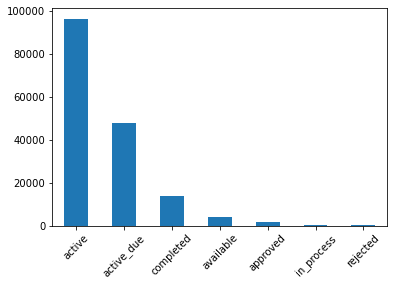

In [18]:
data['client_status'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, fontsize=10)
plt.show()

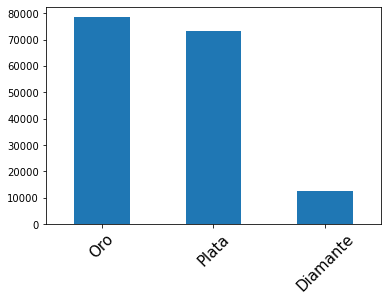

In [19]:
data['level'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, fontsize=15)
plt.show()

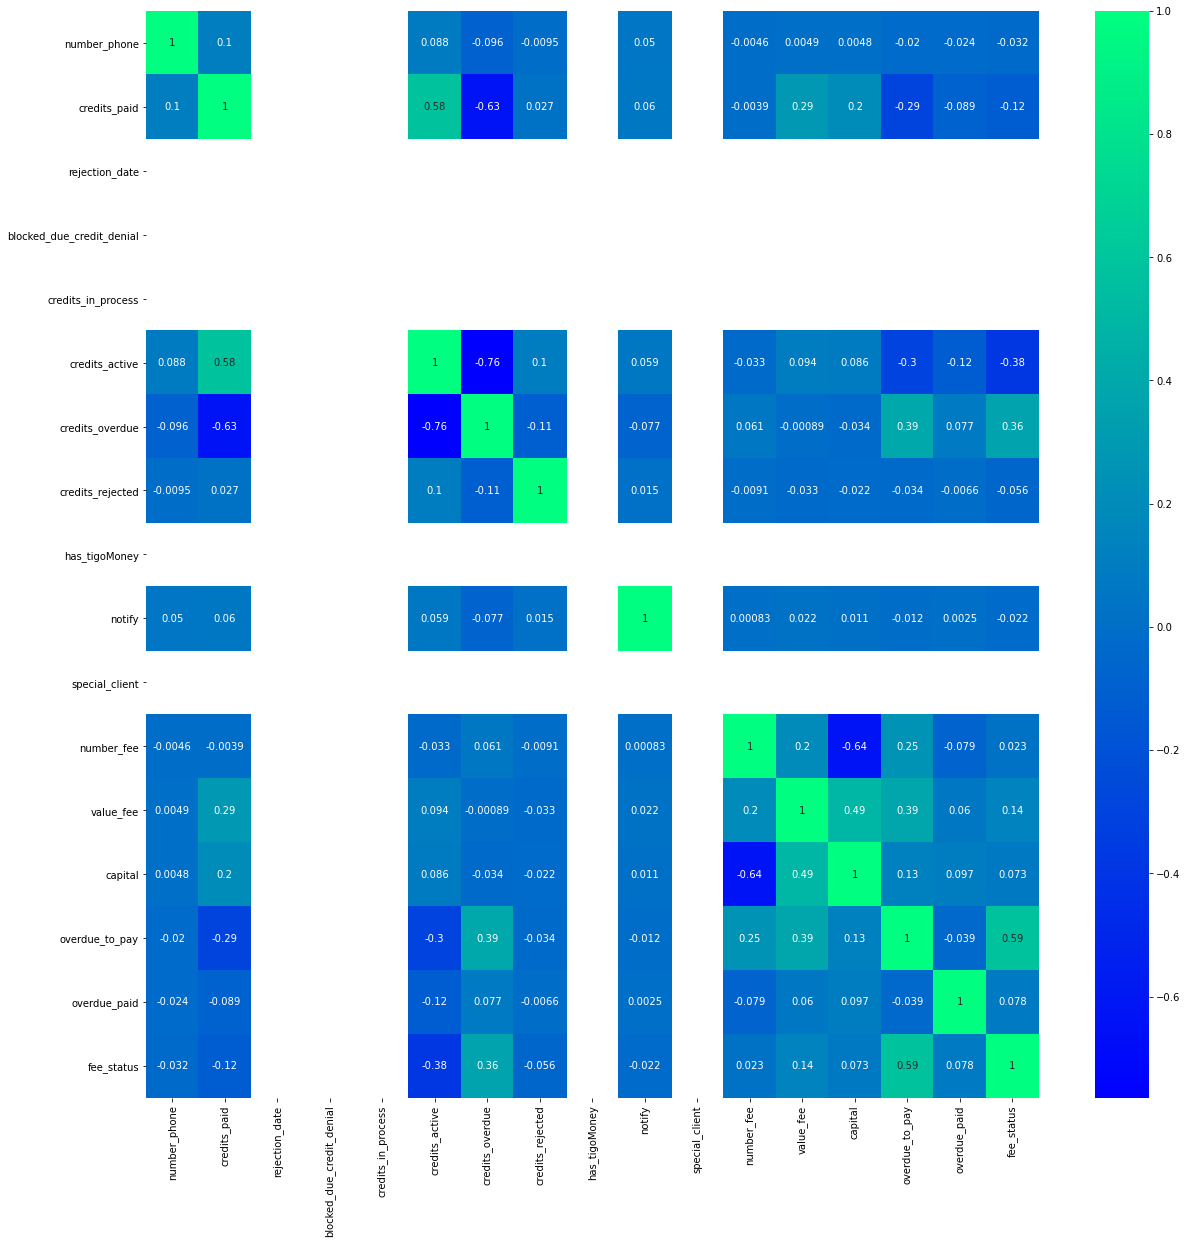

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method="spearman"),annot=True,cmap="winter")
plt.show()

In [21]:
df_reg = data

In [22]:
df_reg

,client_id,number_phone,level,credits_paid,rejection_date,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,...,value_fee,capital,overdue_to_pay,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at,updated_at
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164365,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17,2/2/2021 9:17
164366,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17,2/2/2021 9:17
164367,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17,2/2/2021 9:17
164368,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17,2/2/2021 9:17


In [23]:
freq_tbl(data['level'])

,level,frequency,percentage,cumulative_perc
0,Oro,78562,0.477958,0.477958
1,Plata,73324,0.446091,0.924049
2,Diamante,12484,0.075951,1.000000


In [24]:
data.iloc[ : , :-1]

,client_id,number_phone,level,credits_paid,rejection_date,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,...,number_fee,value_fee,capital,overdue_to_pay,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,1,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,1,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,1,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,1,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,NaN,0,0,0,1,0,...,1,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164365,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,6,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17
164366,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,6,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17
164367,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,6,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17
164368,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,NaN,0,0,1,0,1,...,6,11.35,9.17,0.0,0.0,NaN,1,3/16/2021,NaN,2/2/2021 9:17


In [25]:
data.iloc[ : , 3]


0         0
1         0
2         0
3         0
4         0
         ..
164365    5
164366    5
164367    5
164368    5
164369    5
Name: credits_paid, Length: 164370, dtype: int64

In [26]:
df_reg.dtypes

client_id                            object
number_phone                          int64
level                                object
credits_paid                          int64
rejection_date                      float64
blocked_due_credit_denial             int64
credits_in_process                    int64
credits_active                        int64
credits_overdue                       int64
credits_rejected                      int64
has_tigoMoney                         int64
notify                                int64
special_client                        int64
client_status                        object
city                                 object
question                             object
question_ans                         object
id_fee                               object
number_fee                            int64
value_fee                           float64
capital                             float64
overdue_to_pay                      float64
overdue_paid                    

In [27]:
df_reg.ndim

2

In [28]:
data['rejection_date'].fillna(0, inplace=True)

In [29]:
data.drop('rejection_date', inplace=True, axis=1)


In [30]:
data.isna().sum()


client_id                               0
number_phone                            0
level                                   0
credits_paid                            0
blocked_due_credit_denial               0
credits_in_process                      0
credits_active                          0
credits_overdue                         0
credits_rejected                        0
has_tigoMoney                           0
notify                                  0
special_client                          0
client_status                           0
city                                    0
question                                0
question_ans                          623
id_fee                                  0
number_fee                              0
value_fee                               0
capital                                 0
overdue_to_pay                          0
overdue_paid                            0
fee_paid_amount                     39636
fee_status                        

In [31]:
data['fee_paid_amount']

0         1/14/2021
1         1/14/2021
2         1/14/2021
3         1/14/2021
4         1/14/2021
            ...    
164365          NaN
164366          NaN
164367          NaN
164368          NaN
164369          NaN
Name: fee_paid_amount, Length: 164370, dtype: object

In [32]:
data['fee_paid_amount'].fillna(0, inplace=True)

In [33]:
data['fee_payment_partial_or_completed'].fillna(0, inplace=True)

In [34]:
data['fee_paid_amount']

0         1/14/2021
1         1/14/2021
2         1/14/2021
3         1/14/2021
4         1/14/2021
            ...    
164365            0
164366            0
164367            0
164368            0
164369            0
Name: fee_paid_amount, Length: 164370, dtype: object

In [35]:
df_reg.isna().sum()


client_id                             0
number_phone                          0
level                                 0
credits_paid                          0
blocked_due_credit_denial             0
credits_in_process                    0
credits_active                        0
credits_overdue                       0
credits_rejected                      0
has_tigoMoney                         0
notify                                0
special_client                        0
client_status                         0
city                                  0
question                              0
question_ans                        623
id_fee                                0
number_fee                            0
value_fee                             0
capital                               0
overdue_to_pay                        0
overdue_paid                          0
fee_paid_amount                       0
fee_status                            0
fee_expiration                        0


In [36]:
df_reg["client_status"].value_counts()


active        96479
active_due    47931
completed     14080
available      3869
approved       1648
in_process      249
rejected        114
Name: client_status, dtype: int64

In [37]:
df_reg.drop('question', axis=1, inplace=True)


In [38]:
df_reg.drop('question_ans', axis=1, inplace=True)


In [39]:
df_reg

,client_id,number_phone,level,credits_paid,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,...,value_fee,capital,overdue_to_pay,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at,updated_at
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164365,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164366,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164367,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164368,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17


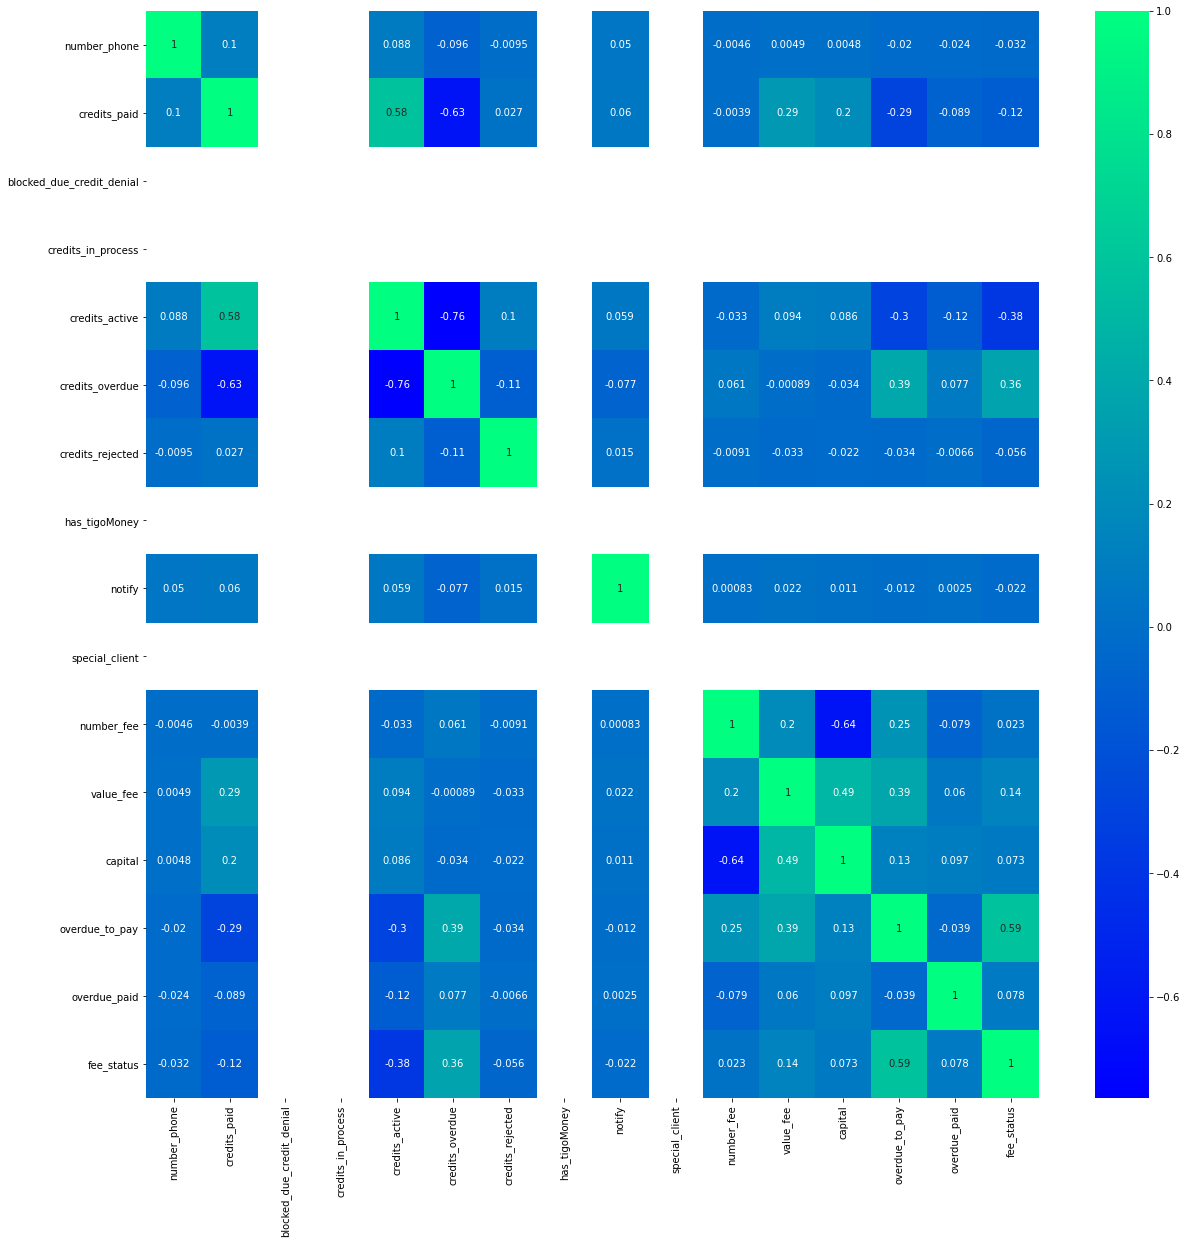

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(df_reg.corr(method="spearman"),annot=True,cmap="winter")
plt.show()

In [41]:
df_reg['credits_in_process']

0         0
1         0
2         0
3         0
4         0
         ..
164365    0
164366    0
164367    0
164368    0
164369    0
Name: credits_in_process, Length: 164370, dtype: int64

In [42]:
df_reg.isin([0]).sum() 

client_id                                0
number_phone                             0
level                                    0
credits_paid                         51491
blocked_due_credit_denial           164370
credits_in_process                  164370
credits_active                       67891
credits_overdue                     116439
credits_rejected                    149701
has_tigoMoney                            0
notify                                 396
special_client                      164370
client_status                            0
city                                     0
id_fee                                   0
number_fee                               0
value_fee                                0
capital                                  0
overdue_to_pay                      154487
overdue_paid                        152847
fee_paid_amount                      39636
fee_status                               0
fee_expiration                           0
fee_payment

In [43]:
df_reg.dtypes

client_id                            object
number_phone                          int64
level                                object
credits_paid                          int64
blocked_due_credit_denial             int64
credits_in_process                    int64
credits_active                        int64
credits_overdue                       int64
credits_rejected                      int64
has_tigoMoney                         int64
notify                                int64
special_client                        int64
client_status                        object
city                                 object
id_fee                               object
number_fee                            int64
value_fee                           float64
capital                             float64
overdue_to_pay                      float64
overdue_paid                        float64
fee_paid_amount                      object
fee_status                            int64
fee_expiration                  

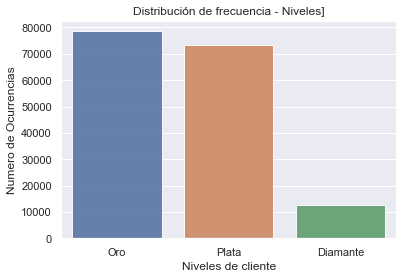

In [44]:

level_count = df_reg['level'].value_counts()
sns.set(style="darkgrid")
sns.barplot(level_count.index, level_count.values, alpha=0.9)
plt.title('Distribución de frecuencia - Niveles]')
plt.ylabel('Numero de Ocurrencias', fontsize=12)
plt.xlabel('Niveles de cliente', fontsize=12)
plt.show()

## Data Convertion

In [45]:
df_reg["client_status"] = df_reg["client_status"].astype('category')


In [46]:
df_reg["level"] = df_reg["level"].astype('category')


In [47]:
status(df_reg)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,client_id,0,0.0,0,0.000000,762,object
1,number_phone,0,0.0,0,0.000000,762,int64
2,level,0,0.0,0,0.000000,3,category
3,credits_paid,0,0.0,51491,0.313263,11,int64
4,blocked_due_credit_denial,0,0.0,164370,1.000000,1,int64
5,credits_in_process,0,0.0,164370,1.000000,1,int64
6,credits_active,0,0.0,67891,0.413038,2,int64
7,credits_overdue,0,0.0,116439,0.708396,2,int64
8,credits_rejected,0,0.0,149701,0.910756,5,int64
9,has_tigoMoney,0,0.0,0,0.000000,1,int64


In [48]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164370 entries, 0 to 164369
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   client_id                         164370 non-null  object  
 1   number_phone                      164370 non-null  int64   
 2   level                             164370 non-null  category
 3   credits_paid                      164370 non-null  int64   
 4   blocked_due_credit_denial         164370 non-null  int64   
 5   credits_in_process                164370 non-null  int64   
 6   credits_active                    164370 non-null  int64   
 7   credits_overdue                   164370 non-null  int64   
 8   credits_rejected                  164370 non-null  int64   
 9   has_tigoMoney                     164370 non-null  int64   
 10  notify                            164370 non-null  int64   
 11  special_client                    16437

In [49]:
df_reg['level'].value_counts().count()


3

In [50]:
df_reg['level'].value_counts()


Oro         78562
Plata       73324
Diamante    12484
Name: level, dtype: int64

In [51]:
df_onehot = df_reg.copy()


In [52]:
df_onehot

,client_id,number_phone,level,credits_paid,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,...,value_fee,capital,overdue_to_pay,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at,updated_at
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,Plata,0,0,0,0,1,0,1,...,7.62,25.00,0.0,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164365,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164366,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164367,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17
164368,36ebf90e-748a-42d0-90b6-adc60f427324,74922867,Oro,5,0,0,1,0,1,1,...,11.35,9.17,0.0,0.0,0,1,3/16/2021,0,2/2/2021 9:17,2/2/2021 9:17


In [53]:
df_onehot = pd.get_dummies(df_onehot,columns=['level'],prefix=['level'])

In [54]:
 df_onehot['client_status']

0         active_due
1         active_due
2         active_due
3         active_due
4         active_due
             ...    
164365        active
164366        active
164367        active
164368        active
164369        active
Name: client_status, Length: 164370, dtype: category
Categories (7, object): [active, active_due, approved, available, completed, in_process, rejected]

In [55]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164370 entries, 0 to 164369
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   client_id                         164370 non-null  object  
 1   number_phone                      164370 non-null  int64   
 2   credits_paid                      164370 non-null  int64   
 3   blocked_due_credit_denial         164370 non-null  int64   
 4   credits_in_process                164370 non-null  int64   
 5   credits_active                    164370 non-null  int64   
 6   credits_overdue                   164370 non-null  int64   
 7   credits_rejected                  164370 non-null  int64   
 8   has_tigoMoney                     164370 non-null  int64   
 9   notify                            164370 non-null  int64   
 10  special_client                    164370 non-null  int64   
 11  client_status                     16437

In [56]:
df_onehot['client_status']=df_onehot["client_status"].cat.codes

In [57]:
df_onehot.head(20)

,client_id,number_phone,credits_paid,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,notify,...,overdue_paid,fee_paid_amount,fee_status,fee_expiration,fee_payment_partial_or_completed,created_at,updated_at,level_Diamante,level_Oro,level_Plata
0,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
1,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
2,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
3,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
4,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
5,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
6,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
7,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
8,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1
9,3f5c0620-ab19-460d-9182-41d5d57468bc,75562416,0,0,0,0,1,0,1,1,...,0.0,1/14/2021,2,1/15/2021,1/14/2021,1/8/2021 15:23,1/15/2021 8:11,0,0,1


In [58]:
y = df_onehot['client_status']

In [59]:
df_onehot.drop('client_status', inplace=True,axis=1)

In [60]:
df_onehot.drop('city', inplace=True,axis=1)

In [61]:
df_onehot.drop('client_id', inplace=True,axis=1)
df_onehot.drop('number_phone', inplace=True,axis=1)
df_onehot.drop('id_fee', inplace=True,axis=1)
df_onehot.drop('fee_expiration', inplace=True,axis=1)
df_onehot.drop('fee_payment_partial_or_completed', inplace=True,axis=1)
df_onehot.drop('created_at', inplace=True,axis=1)
df_onehot.drop('updated_at', inplace=True,axis=1)
df_onehot.drop('fee_paid_amount', inplace=True,axis=1)


In [62]:
x = df_onehot

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164370 entries, 0 to 164369
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credits_paid               164370 non-null  int64  
 1   blocked_due_credit_denial  164370 non-null  int64  
 2   credits_in_process         164370 non-null  int64  
 3   credits_active             164370 non-null  int64  
 4   credits_overdue            164370 non-null  int64  
 5   credits_rejected           164370 non-null  int64  
 6   has_tigoMoney              164370 non-null  int64  
 7   notify                     164370 non-null  int64  
 8   special_client             164370 non-null  int64  
 9   number_fee                 164370 non-null  int64  
 10  value_fee                  164370 non-null  float64
 11  capital                    164370 non-null  float64
 12  overdue_to_pay             164370 non-null  float64
 13  overdue_paid               16

In [64]:
df_onehot

,credits_paid,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,notify,special_client,number_fee,value_fee,capital,overdue_to_pay,overdue_paid,fee_status,level_Diamante,level_Oro,level_Plata
0,0,0,0,0,1,0,1,1,0,1,7.62,25.00,0.0,0.0,2,0,0,1
1,0,0,0,0,1,0,1,1,0,1,7.62,25.00,0.0,0.0,2,0,0,1
2,0,0,0,0,1,0,1,1,0,1,7.62,25.00,0.0,0.0,2,0,0,1
3,0,0,0,0,1,0,1,1,0,1,7.62,25.00,0.0,0.0,2,0,0,1
4,0,0,0,0,1,0,1,1,0,1,7.62,25.00,0.0,0.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164365,5,0,0,1,0,1,1,1,0,6,11.35,9.17,0.0,0.0,1,0,1,0
164366,5,0,0,1,0,1,1,1,0,6,11.35,9.17,0.0,0.0,1,0,1,0
164367,5,0,0,1,0,1,1,1,0,6,11.35,9.17,0.0,0.0,1,0,1,0
164368,5,0,0,1,0,1,1,1,0,6,11.35,9.17,0.0,0.0,1,0,1,0


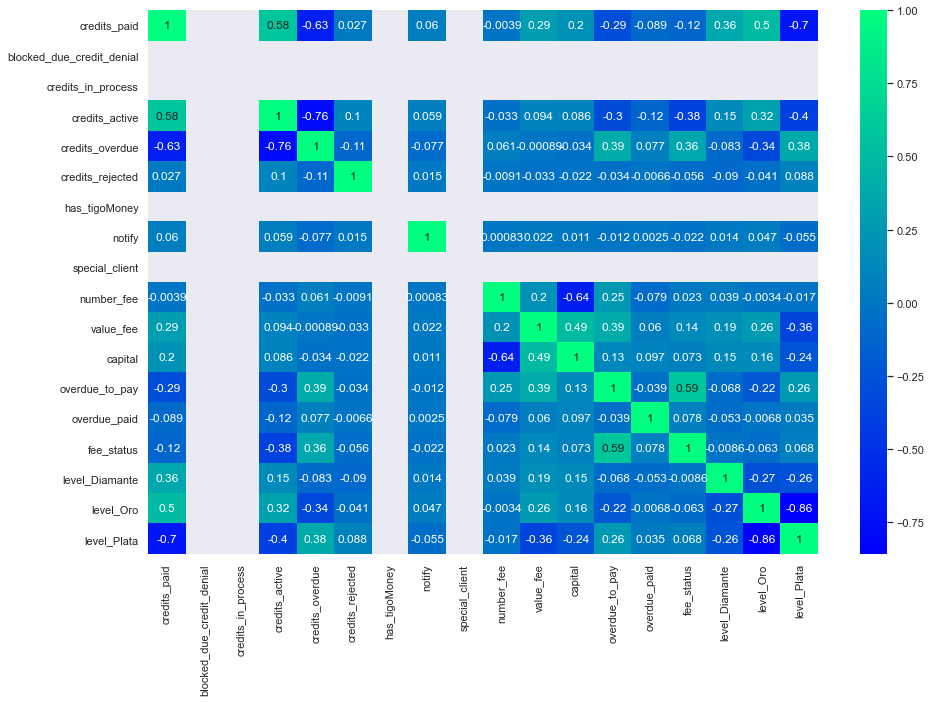

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df_onehot.corr(method="spearman"),annot=True,cmap="winter")
plt.savefig('corr.png')
plt.show()


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [67]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(131496, 18) (32874, 18) (131496,) (32874,)


In [68]:
x_train

,credits_paid,blocked_due_credit_denial,credits_in_process,credits_active,credits_overdue,credits_rejected,has_tigoMoney,notify,special_client,number_fee,value_fee,capital,overdue_to_pay,overdue_paid,fee_status,level_Diamante,level_Oro,level_Plata
23316,4,0,0,1,0,0,1,1,0,1,9.14,30.00,0.00,0.0,2,0,1,0
30589,9,0,0,1,0,0,1,1,0,1,7.62,25.00,0.00,0.0,2,1,0,0
125301,1,0,0,1,0,0,1,1,0,4,7.62,6.25,0.00,0.0,1,0,0,1
155868,0,0,0,0,1,0,1,1,0,4,24.40,20.00,2.26,0.0,3,0,0,1
47026,0,0,0,0,1,0,1,1,0,2,7.62,18.75,0.00,0.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,3,0,0,0,0,0,1,1,0,1,9.14,30.00,0.00,0.0,2,0,0,1
117059,0,0,0,0,1,1,1,1,0,4,6.10,5.00,0.00,0.0,2,0,0,1
70335,7,0,0,1,0,0,1,1,0,2,22.33,52.50,0.00,0.0,1,0,1,0
129120,5,0,0,1,0,0,1,1,0,4,8.26,20.00,0.00,0.0,2,0,1,0


In [69]:
y_train

23316     0
30589     0
125301    0
155868    1
47026     1
         ..
16635     4
117059    1
70335     0
129120    0
106769    1
Name: client_status, Length: 131496, dtype: int8

In [70]:
regressor = LinearRegression()

In [71]:
regressor.fit(x_train,y_train)

LinearRegression()

In [72]:
print('Coefficients: \n', regressor.coef_)


Coefficients: 
 [-1.53600932e-02 -1.52273564e+06 -3.53991082e+07 -3.64468774e+00
 -2.69109811e+00  3.96904996e-02 -3.55273283e+06 -5.87407821e-04
  2.27921437e+06 -4.56420816e-03  2.85914964e-03 -8.20595466e-04
 -2.45347582e-02  7.68553301e-03  1.71790603e-02  9.34921468e+09
  9.34921468e+09  9.34921468e+09]


In [73]:
regressor.predict(x_test)

array([ 0.99707794, -0.04952621,  0.09084702, ..., -0.01210403,
        3.64314079, -0.059021  ])

In [74]:
y_test

117951    1
162664    0
28787     0
81253     0
24101     1
         ..
115272    0
125827    0
94805     0
33191     4
29319     0
Name: client_status, Length: 32874, dtype: int8